In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/toyotacorollacsv/ToyotaCorolla.csv


In [ ]:
# Set up the Toyota csv file as a DataFrame
cars_df = pd.read_csv('/kaggle/input/toyotacorollacsv/ToyotaCorolla.csv', index_col = 0)

# Let's see a preview of the data
cars_df.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,0,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,0,...,1,0,1,0,0,0,1,0,0,0
3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,0,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,0,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
cars_df.columns

Index(['Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [ ]:
cars = cars_df.copy(deep = True)   #true is default and false is for shallow copy
cars.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,0,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,0,...,1,0,1,0,0,0,1,0,0,0
3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,0,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,0,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
cars.memory_usage().head()

Index        11488
Model        11488
Price        11488
Age_08_04    11488
Mfg_Month    11488
dtype: int64

In [ ]:
cars.loc[:,['Fuel_Type','Price']].head(3)  #Access a group of rows and columns by label(s).

,Fuel_Type,Price
Id,,
1,Diesel,13500
2,Diesel,13750
3,Diesel,13950


In [ ]:
cars.dtypes.value_counts()

int64     34
object     2
dtype: int64

In [ ]:
#cars_cpy.select_dtypes(include = None, exclude = None).head(2) #default

In [ ]:
cars.select_dtypes(exclude = [object]).head(3)  

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,13500,23,10,2002,46986,90,1,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
2,13750,23,10,2002,72937,90,1,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
3,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
cars.info()  #entries are 1436, row labels are 1 to 1442

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 36 columns):
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Automatic           1436 non-null int64
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64
Airbag_2            1436 non-null int64
Airco      

In [ ]:
print(np.unique(cars['Doors']))
print(np.unique(cars['cc']))
print(np.unique(cars['Automatic']))

[2 3 4 5]
[ 1300  1332  1398  1400  1587  1598  1600  1800  1900  1975  1995  2000
 16000]
[0 1]


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 36 columns):
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Automatic           1436 non-null int64
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64
Airbag_2            1436 non-null int64
Airco      

In [ ]:
cars['Met_Color'] = cars['Met_Color'].astype('object')
cars['Automatic'] = cars['Automatic'].astype('object')


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 36 columns):
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null object
Automatic           1436 non-null object
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64
Airbag_2            1436 non-null int64
Airco    

In [ ]:
cars.isnull().sum()

Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [ ]:
columns_to_drop = ['Model','Mfg_Month', 'Mfg_Year','Cylinders',
       'Gears', 'Quarterly_Tax','Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar']
cars.drop(columns_to_drop, axis = 1, inplace= True)
cars.sample(5)
     

,Price,Age_08_04,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Weight
Id,,,,,,,,,,
1414,8250,69,44826,Petrol,110,0,0,1600,5,1075
572,10950,52,36000,Petrol,110,1,0,1600,5,1075
1147,7950,73,103121,Petrol,86,1,0,1300,5,1035
641,7995,59,121626,Petrol,86,0,0,1300,5,1050
800,11950,60,74337,Petrol,86,0,0,1300,5,1035


In [ ]:

cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [ ]:
cars.rename(columns = {'Age_08_04':'Age_Months', 'cc':'CC'}, inplace = True)
cars.sample(2)

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight
Id,,,,,,,,,,
1226,7950,73,85200,Petrol,110,1,0,1600,3,1050
990,9950,61,45000,Petrol,107,0,1,1600,3,1085


In [ ]:
cars.insert(10, "Price_Class", " ")

In [ ]:
for i in range(0, len(cars['Price']), 1):
    if cars['Price'].iloc[i] <= 8450:
        cars["Price_Class"].iloc[i] = 'Cheap'
    elif cars['Price'].iloc[i] >= 11950:
         cars["Price_Class"].iloc[i] = 'Expensive'
    else:
        cars['Price_Class'].iloc[i] = 'Average'
        

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
cars.insert(11, "Age", " ")

In [ ]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_Months,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
CC,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [ ]:
i = 0
while i < len(cars['Age_Months']):
    if cars['Age_Months'].iloc[i] <= 44:
        cars['Age'].iloc[i] = 'New Model'
        
    elif cars['Age_Months'].iloc[i] >= 70:
        cars['Age'].iloc[i] = 'Very Old'
               
    else:
        cars['Age'].iloc[i] = 'Old'
    i+=1           

In [ ]:
cars['Age'].value_counts()

Old          689
New Model    378
Very Old     369
Name: Age, dtype: int64

In [ ]:
cars['Price_Class'].value_counts()

Average      704
Cheap        369
Expensive    363
Name: Price_Class, dtype: int64

In [ ]:
cars.head()

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight,Price_Class,Age
Id,,,,,,,,,,,,
1,13500,23,46986,Diesel,90,1,0,2000,3,1165,Expensive,New Model
2,13750,23,72937,Diesel,90,1,0,2000,3,1165,Expensive,New Model
3,13950,24,41711,Diesel,90,1,0,2000,3,1165,Expensive,New Model
4,14950,26,48000,Diesel,90,0,0,2000,3,1165,Expensive,New Model
5,13750,30,38500,Diesel,90,0,0,2000,3,1170,Expensive,New Model


In [ ]:
cars.insert(12, "Age-Year",0)

In [ ]:
cars.insert(12, 'KM/Month', 0)

In [ ]:
cars.head()

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight,Price_Class,Age,KM/Month,Age-Year
Id,,,,,,,,,,,,,,
1,13500,23,46986,Diesel,90,1,0,2000,3,1165,Expensive,New Model,0,0
2,13750,23,72937,Diesel,90,1,0,2000,3,1165,Expensive,New Model,0,0
3,13950,24,41711,Diesel,90,1,0,2000,3,1165,Expensive,New Model,0,0
4,14950,26,48000,Diesel,90,0,0,2000,3,1165,Expensive,New Model,0,0
5,13750,30,38500,Diesel,90,0,0,2000,3,1170,Expensive,New Model,0,0


In [ ]:
def conversion(val1, val2):
    val_con = val1/12
    ratio   = val2/val1
    return [val_con, ratio]

In [ ]:
cars['Age-Year'], cars['KM/Month'] = conversion(cars['Age_Months'], cars['KM'])


In [ ]:
cars.sample(5)

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight,Price_Class,Age,KM/Month,Age-Year
Id,,,,,,,,,,,,,,
1347,8950,77,62595,Petrol,110,1,0,1600,3,1050,Average,Very Old,812.922078,6.416667
274,13500,35,48052,Diesel,69,1,0,1900,3,1105,Expensive,New Model,1372.914286,2.916667
676,8495,68,104299,Petrol,110,1,0,1600,5,1085,Average,Old,1533.808824,5.666667
607,6950,58,205000,Diesel,72,1,0,2000,4,1100,Cheap,Old,3534.482759,4.833333
418,9950,55,97234,Petrol,110,0,0,1600,5,1080,Average,Old,1767.890909,4.583333


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 14 columns):
Price          1436 non-null int64
Age_Months     1436 non-null int64
KM             1436 non-null int64
Fuel_Type      1436 non-null object
HP             1436 non-null int64
Met_Color      1436 non-null object
Automatic      1436 non-null object
CC             1436 non-null int64
Doors          1436 non-null int64
Weight         1436 non-null int64
Price_Class    1436 non-null object
Age            1436 non-null object
KM/Month       1436 non-null float64
Age-Year       1436 non-null float64
dtypes: float64(2), int64(7), object(5)
memory usage: 168.3+ KB


In [ ]:
pd.crosstab(index = cars['Fuel_Type'], columns = 'count', dropna = True)

col_0,count
Fuel_Type,
CNG,17
Diesel,155
Petrol,1264


In [ ]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'], dropna = True)  #two-way table

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,16,155,1185
1,1,0,79


In [ ]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'], normalize = True, dropna = True)  #two-way table, joint-probability

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,0.011142,0.107939,0.825209
1,0.000696,0.000000,0.055014


In [ ]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'],margins = True, normalize = True, dropna = True) #two-way table, marginal probability

Fuel_Type,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.011142,0.107939,0.825209,0.94429
1,0.000696,0.000000,0.055014,0.05571
All,0.011838,0.107939,0.880223,1.00000


In [ ]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'],margins = True, normalize = 'index', dropna = True) #two-way-conditional-probability

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,0.011799,0.114307,0.873894
1,0.012500,0.000000,0.987500
All,0.011838,0.107939,0.880223


In [ ]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'],margins = True, normalize = 'columns', dropna = True)

Fuel_Type,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.941176,1.0,0.9375,0.94429
1,0.058824,0.0,0.0625,0.05571


In [ ]:
numerical_data = cars.select_dtypes(exclude = [object])
print(numerical_data.shape)

(1436, 9)


In [ ]:
corr_matrix = numerical_data.corr()
corr_matrix

,Price,Age_Months,KM,HP,CC,Doors,Weight,KM/Month,Age-Year
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.581198,-0.023369,-0.876590
Age_Months,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.470253,-0.125711,1.000000
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,-0.028598,0.724024,0.505672
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.089614,-0.260631,-0.156622
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.335637,0.175403,-0.098084
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,0.302618,0.049075,-0.148359
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,1.000000,0.324752,-0.470253
KM/Month,-0.023369,-0.125711,0.724024,-0.260631,0.175403,0.049075,0.324752,1.000000,-0.125711
Age-Year,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.470253,-0.125711,1.000000


In [ ]:
import matplotlib.pyplot as plt

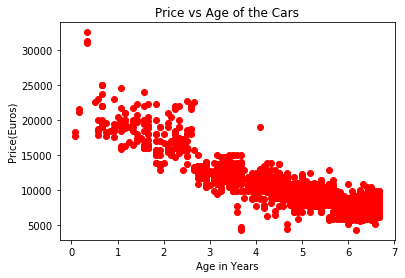

In [ ]:
plt.scatter(cars['Age-Year'], cars['Price'], c = 'red')
plt.title('Price vs Age of the Cars')
plt.xlabel('Age in Years')
plt.ylabel('Price(Euros)')
plt.show()

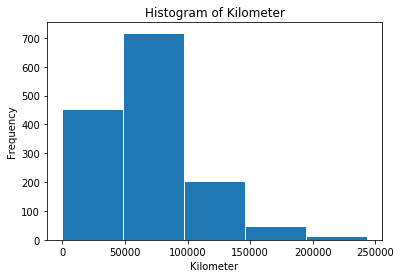

In [ ]:
plt.hist(cars['KM'], edgecolor = 'white', bins = 5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

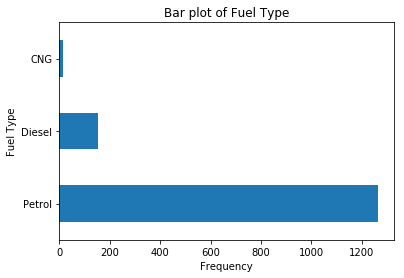

In [ ]:
fuel_count = pd.value_counts(cars['Fuel_Type'].values, sort = True)
plt.xlabel('Frequency')
plt.ylabel('Fuel Type')
plt.title('Bar plot of Fuel Type')
fuel_count.plot.barh()

In [ ]:
import seaborn as sns

In [ ]:
cars.head()

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight,Price_Class,Age,KM/Month,Age-Year
Id,,,,,,,,,,,,,,
1,13500,23,46986,Diesel,90,1,0,2000,3,1165,Expensive,New Model,2042.869565,1.916667
2,13750,23,72937,Diesel,90,1,0,2000,3,1165,Expensive,New Model,3171.173913,1.916667
3,13950,24,41711,Diesel,90,1,0,2000,3,1165,Expensive,New Model,1737.958333,2.000000
4,14950,26,48000,Diesel,90,0,0,2000,3,1165,Expensive,New Model,1846.153846,2.166667
5,13750,30,38500,Diesel,90,0,0,2000,3,1170,Expensive,New Model,1283.333333,2.500000


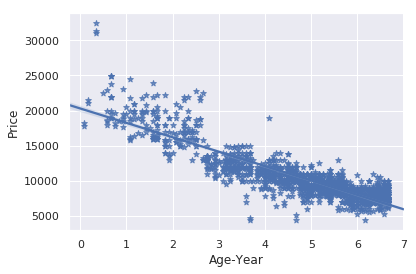

In [ ]:
sns.set(style = 'darkgrid')
sns.regplot(x = cars['Age-Year'], y = cars['Price'], marker = '*')

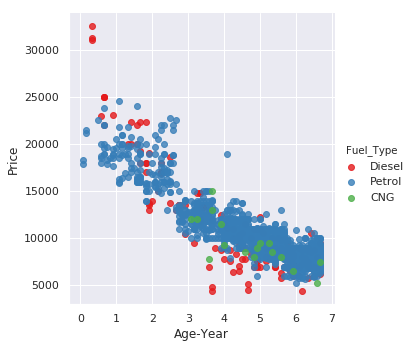

In [ ]:
sns.lmplot(x = 'Age-Year', y = 'Price', data = cars, hue = 'Fuel_Type', fit_reg= False, legend = True, palette ='Set1')

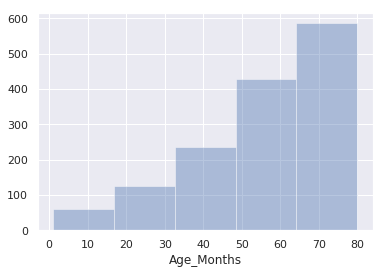

In [ ]:
sns.distplot(cars['Age_Months'], kde = False, bins = 5)

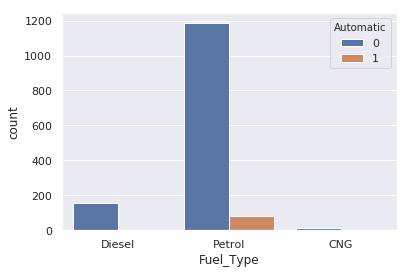

In [ ]:
sns.countplot(x = 'Fuel_Type', data = cars, hue = 'Automatic')

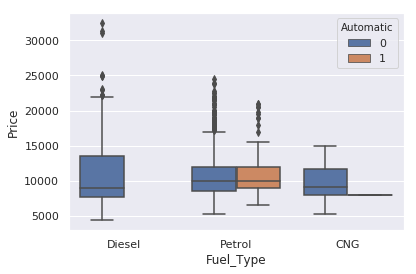

In [ ]:
sns.boxplot(y = cars['Price'], x = cars['Fuel_Type'], hue = cars['Automatic'])

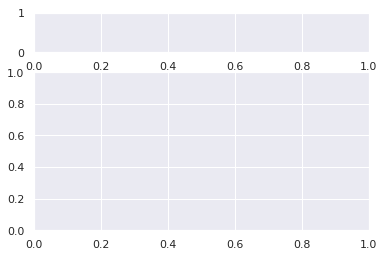

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})

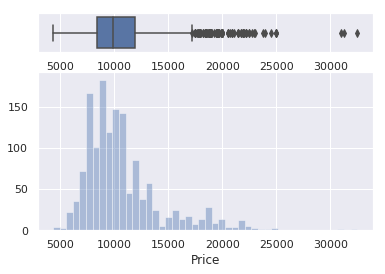

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})
sns.boxplot(cars['Price'], ax = ax_box)
sns.distplot(cars['Price'], ax = ax_hist, kde = False)

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


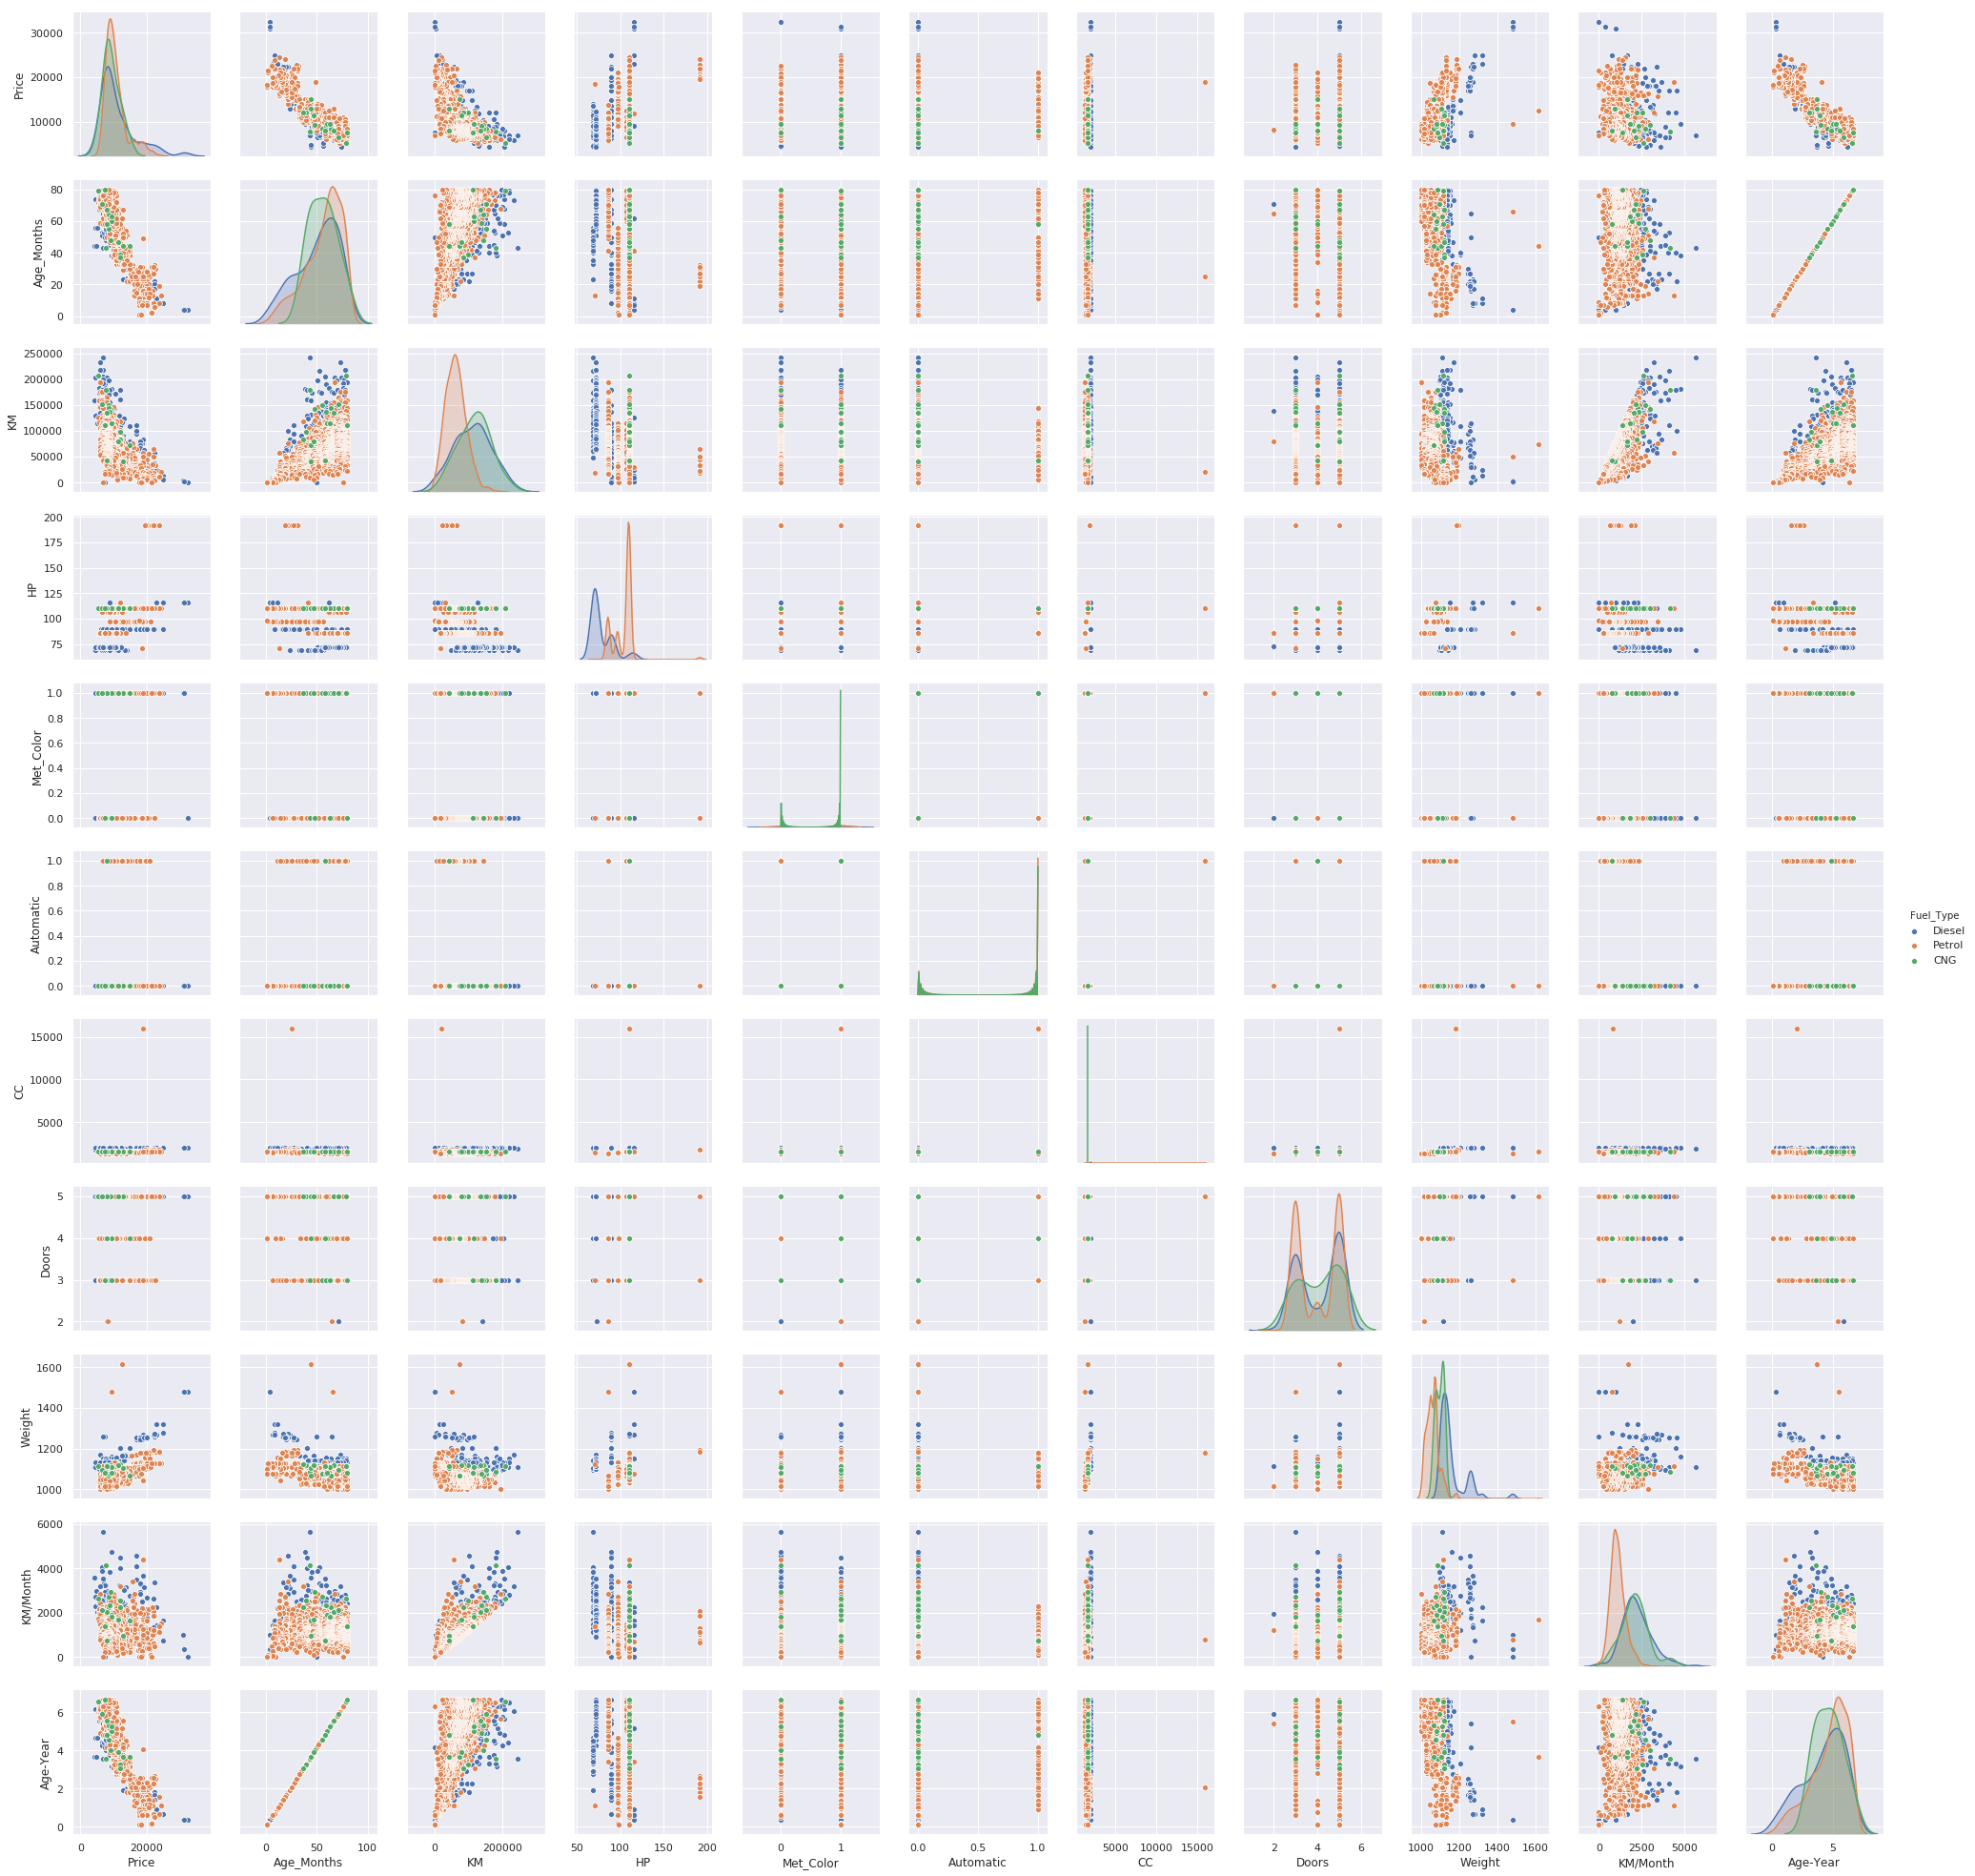

In [ ]:
sns.pairplot(cars, kind = 'scatter', hue = 'Fuel_Type')